In [1]:
# import all libraries required in the code
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
#nltk.download('punkt')
import string
from nltk.corpus import stopwords
import math
from collections import Counter
#nltk.download('stopwords')
import pprint 
pp = pprint.PrettyPrinter(indent=4)
%matplotlib inline

# read in the data from the supplied assignment file and check input via table 
df = pd.read_csv("data_assignment.csv")


In [2]:
#Clean the dates up
df["Date"] = df["Date"].replace(to_replace = r'T.*', value = '', regex = True)

#select the dates and count them, then sort by date
graphDates = df['Date'].value_counts().sort_index()
#create new dataframe with index reset
newGraphDates = graphDates.reset_index()



In [3]:
#add 7 day and 30 day rolling information to dataframe

newGraphDates['7Days'] = newGraphDates.iloc[:,1].rolling(window = 7).mean()
newGraphDates['30Days'] = newGraphDates.iloc[:,1].rolling(window = 31).mean()

In [4]:
#check that data had updated
newGraphDates

,index,Date,7Days,30Days
0,2018-10-01,1023,NaN,NaN
1,2018-10-02,1980,NaN,NaN
2,2018-10-03,4945,NaN,NaN
3,2018-10-04,8506,NaN,NaN
4,2018-10-05,5711,NaN,NaN
5,2018-10-06,471,NaN,NaN
6,2018-10-07,1037,3381.857143,NaN
7,2018-10-08,4995,3949.285714,NaN
8,2018-10-09,6329,4570.571429,NaN
9,2018-10-10,8337,5055.142857,NaN


0     2018-10-01
1     2018-10-02
2     2018-10-03
3     2018-10-04
4     2018-10-05
5     2018-10-06
6     2018-10-07
7     2018-10-08
8     2018-10-09
9     2018-10-10
10    2018-10-11
11    2018-10-12
12    2018-10-13
13    2018-10-14
14    2018-10-15
15    2018-10-16
16    2018-10-17
17    2018-10-18
18    2018-10-19
19    2018-10-20
20    2018-10-21
21    2018-10-22
22    2018-10-23
23    2018-10-24
24    2018-10-25
25    2018-10-26
26    2018-10-27
27    2018-10-28
28    2018-10-29
29    2018-10-30
30    2018-10-31
31    2018-11-01
32    2018-11-02
33    2018-11-03
34    2018-11-04
35    2018-11-05
36    2018-11-06
37    2018-11-07
38    2018-11-08
39    2018-11-09
40    2018-11-10
41    2018-11-11
42    2018-11-12
43    2018-11-13
Name: index, dtype: object

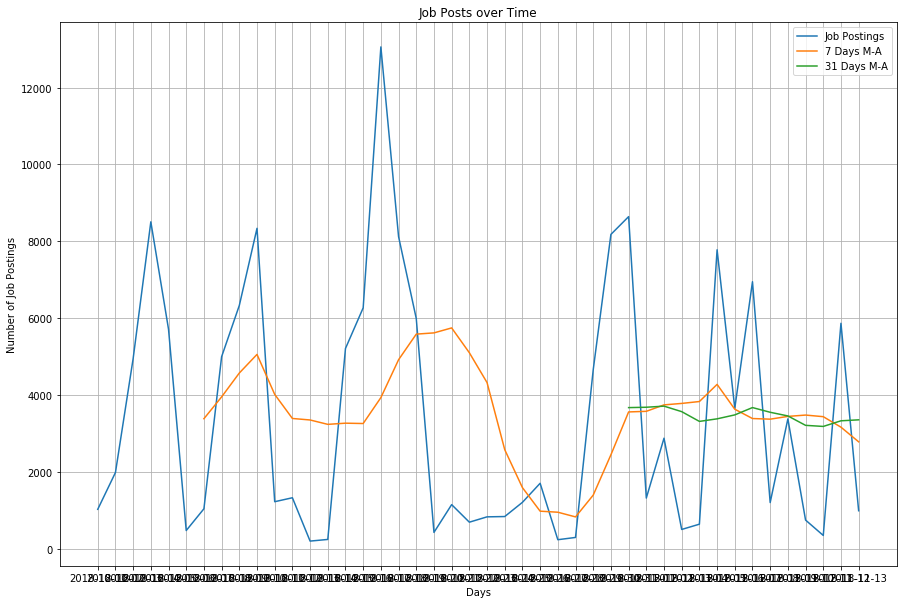

In [12]:
x = newGraphDates['index']
Actual = newGraphDates['Date']
Actual7Days = newGraphDates['7Days']
Actual31Days = newGraphDates['30Days']
GraphLabels = [Actual, Actual7Days, Actual31Days]
plt.figure(figsize=(15,10))

for i in range(3):    
    plt.title(f'Job Posts over Time')
    plt.xlabel('Days')
    plt.ylabel('Number of Job Postings')
    #GraphLabels[i].plot(kind='line')
    plt.plot(x, GraphLabels[i])
plt.grid()
plt.legend(['Job Postings', '7 Days M-A', '31 Days M-A'], loc = 'upper right')
plt.show()